In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import pysam
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy.stats import mode

In [2]:
sex_palette = {'Male': '#5197D0', 'Female': '#FF7593'}
cohort_palette={'ucsf': '#204e79', 'uq':'#af1a24'}
type_palette={'als':'#ef622b', 'ctrl':'#af1a24'}
blue_orange={'ctrl':'#7da7cd', 'als':'#ef622b'}

In [3]:
ucsf = pd.DataFrame(pd.read_csv("./ucsf_fragment_lengths.csv"))
uq = pd.DataFrame(pd.read_csv("./uq_fragment_lengths.csv"))

In [4]:
ucsf

,Sample,Fragment Size
0,12,179
1,12,175
2,12,129
3,12,149
4,12,189
...,...,...
959995,96,175
959996,96,146
959997,96,131
959998,96,129


In [5]:
ucsf['Fragment Size'].max()

400

In [6]:
38 in uq['Sample'].values

False

In [7]:
clinical = pd.DataFrame(pd.read_csv("../als_cfdna_samples/combined_metadata_redone.csv"))
clinical = clinical[clinical['sample_type'] != 'bsctrl']

In [8]:
uq_clinical = clinical[clinical['cohort'] == 'uq']

uq['Sample'] = uq['Sample'].astype(int) + 96

uq_merged_df = pd.merge(uq, clinical[clinical['cohort'] == 'uq'], left_on='Sample', right_on='sample_num')

uq_merged_df = uq_merged_df.drop(columns=['Sample'])

In [9]:
ucsf_merged_df = pd.merge(ucsf, clinical[clinical['cohort'] == 'ucsf'], left_on='Sample', right_on='sample_num')

ucsf_merged_df = ucsf_merged_df.drop(columns=['Sample'])
merged_df = pd.concat([ucsf_merged_df, uq_merged_df])

## histograms

In [10]:
# Create a new column to uniquely identify each fragment size within a sample
merged_df['Fragment_Index'] = merged_df.groupby('sample_num').cumcount()

# Pivot the table so that each fragment index becomes a separate column
df_pivoted = merged_df.pivot_table(index='sample_num', 
                            columns='Fragment_Index', 
                            values='Fragment Size').reset_index()

df_pivoted

Fragment_Index,sample_num,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,196.0,177.0,142.0,173.0,169.0,211.0,178.0,165.0,181.0,...,119.0,178.0,290.0,188.0,190.0,182.0,146.0,160.0,112.0,167.0
1,2,210.0,153.0,137.0,159.0,178.0,212.0,212.0,196.0,138.0,...,212.0,157.0,190.0,140.0,199.0,138.0,131.0,160.0,142.0,208.0
2,3,205.0,282.0,338.0,168.0,175.0,354.0,154.0,184.0,171.0,...,187.0,260.0,136.0,196.0,167.0,201.0,172.0,164.0,158.0,151.0
3,4,153.0,165.0,181.0,171.0,147.0,158.0,148.0,164.0,158.0,...,92.0,187.0,174.0,179.0,162.0,161.0,182.0,160.0,250.0,343.0
4,5,205.0,135.0,191.0,173.0,321.0,196.0,151.0,165.0,342.0,...,199.0,208.0,346.0,172.0,151.0,234.0,125.0,180.0,166.0,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,188,166.0,218.0,156.0,183.0,146.0,173.0,213.0,172.0,190.0,...,176.0,165.0,191.0,147.0,224.0,148.0,154.0,131.0,140.0,184.0
186,189,129.0,232.0,176.0,172.0,135.0,155.0,113.0,139.0,191.0,...,126.0,170.0,190.0,154.0,171.0,128.0,207.0,201.0,177.0,178.0
187,190,334.0,225.0,206.0,139.0,215.0,224.0,125.0,218.0,161.0,...,388.0,298.0,153.0,146.0,225.0,159.0,159.0,171.0,192.0,174.0
188,191,193.0,177.0,156.0,175.0,160.0,170.0,189.0,150.0,203.0,...,166.0,183.0,180.0,232.0,171.0,180.0,184.0,190.0,144.0,170.0


In [11]:
num=1

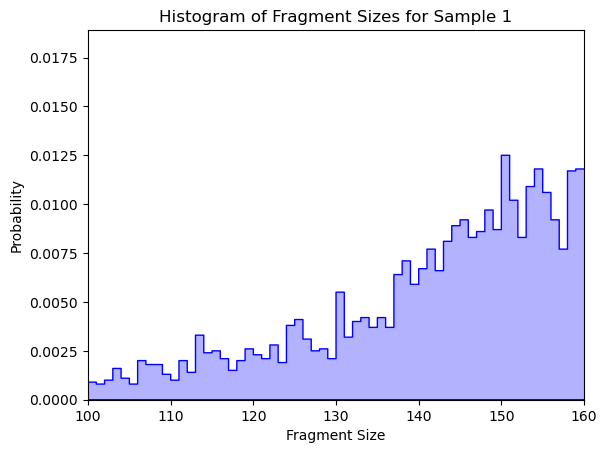

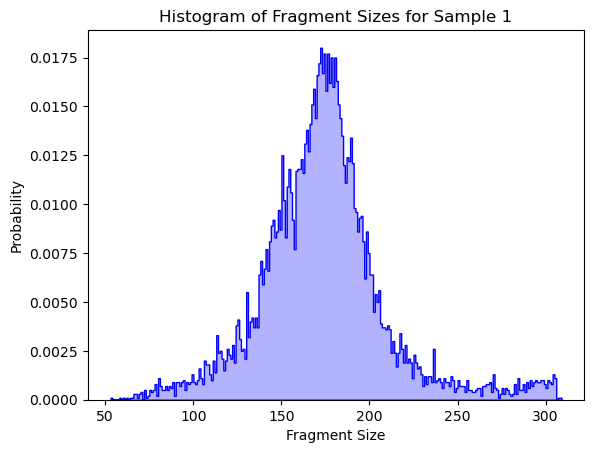

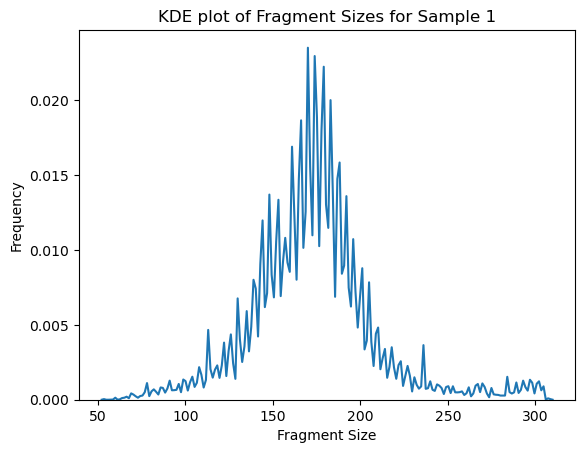

In [12]:
df_filtered = df_pivoted[df_pivoted['sample_num'] == num]

fragment_sizes = df_filtered.drop(columns=['sample_num']).values.flatten()
filtered_lengths = fragment_sizes[fragment_sizes < 161]
filtered_lengths = filtered_lengths[filtered_lengths >= 100]

sns.histplot(data=fragment_sizes, element='step', stat='probability', color='blue', binwidth=1, common_norm=False, alpha=0.3)
plt.title(f'Histogram of Fragment Sizes for Sample {num}')
plt.xlabel('Fragment Size')
plt.ylabel('Probability')
plt.xlim(100,160)
plt.show()

sns.histplot(data=fragment_sizes, element='step', stat='probability', color='blue', binwidth=1, common_norm=False, alpha=0.3)
plt.title(f'Histogram of Fragment Sizes for Sample {num}')
plt.xlabel('Fragment Size')
plt.ylabel('Probability')
plt.show()

sns.kdeplot(data=fragment_sizes, alpha=1, bw_adjust=0.05)
plt.title(f'KDE plot of Fragment Sizes for Sample {num}')
plt.xlabel('Fragment Size')
plt.ylabel('Frequency')
plt.show()

# Define bins from 50 to 400, with a width of 1 bp
bins = np.arange(50, 402, 1)

# Calculate the histogram
counts, bin_edges = np.histogram(fragment_sizes, bins=bins)

# Create a DataFrame with bin edges and counts
df_histogram = pd.DataFrame({'bin_start': bin_edges[:-1], 'count': counts})
df_histogram.set_index('bin_start', inplace=True)

In [13]:
def create_histogram_matrix(df_pivoted):
    
    histograms_list = []
    
    for num in range(1,197):
            
        df_filtered = df_pivoted[df_pivoted['sample_num'] == num]
        if df_filtered.empty:
            continue

        fragment_sizes = df_filtered.drop(columns=['sample_num']).values.flatten()

        # Define bins from 50 to 400, with a width of 1 bp
        bins = np.arange(50, 402, 1)

        # Calculate the histogram
        counts, bin_edges = np.histogram(fragment_sizes, bins=bins)

        # Create a DataFrame with bin edges and counts
        df_histogram = pd.DataFrame({'bin_start': bin_edges[:-1], 'count': counts})
        df_histogram.set_index('bin_start', inplace=True)
        
        # Transpose the DataFrame to have bins as columns and counts as row values
        df_t = df_histogram.T

        # Add a column for the sample number to keep track
        df_t['sample_num'] = num

        # Append the transposed DataFrame to the list
        histograms_list.append(df_t)
        
    # Concatenate all the histograms into a single DataFrame
    df_histogram_matrix = pd.concat(histograms_list, axis=0)
    df_histogram_matrix.set_index('sample_num', inplace=True)

    return df_histogram_matrix

In [14]:
histogram_matrix = create_histogram_matrix(df_pivoted)

In [15]:
histogram_matrix

bin_start,50,51,52,53,54,55,56,57,58,59,...,391,392,393,394,395,396,397,398,399,400
sample_num,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,1,1,1,1,1,6,...,0,0,0,0,0,0,0,0,0,0
3,3,2,2,1,1,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,1,1,1,...,7,4,5,2,4,2,2,7,1,3
5,2,1,1,1,1,2,4,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
189,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
190,0,0,1,2,1,1,3,0,1,0,...,8,3,8,4,3,3,10,8,7,4


In [16]:
#histogram_matrix.to_csv('histogram_matrix.csv', index='sample_num')

## kde plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


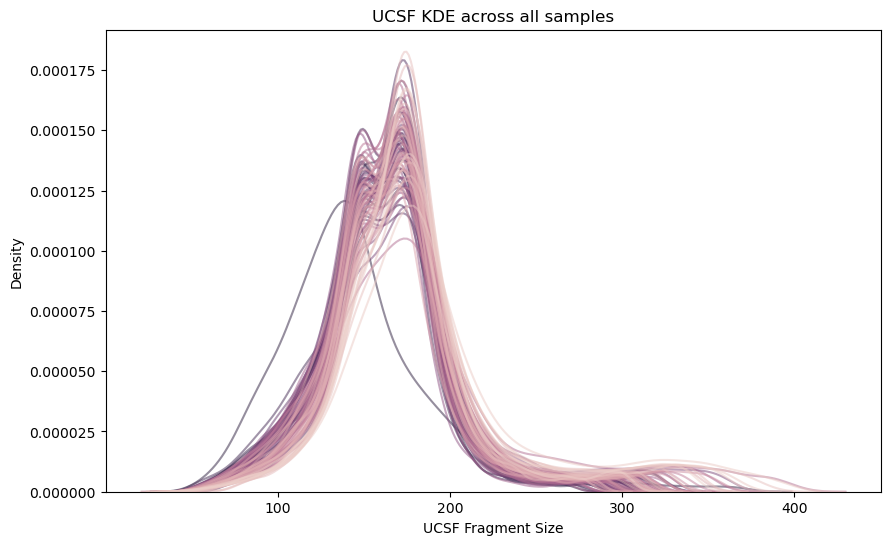

In [17]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=ucsf, x='Fragment Size', hue='Sample', alpha=0.5)

plt.xlabel('UCSF Fragment Size')
plt.ylabel('Density')
plt.title('UCSF KDE across all samples')
plt.legend().remove()

# Show the plot
plt.show()

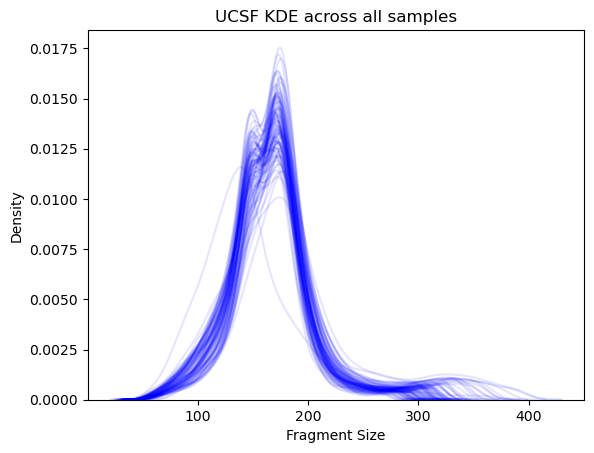

In [18]:
unique_samples = ucsf['Sample'].unique()
line_color = 'blue'
for sample in unique_samples:
    sns.kdeplot(ucsf[ucsf['Sample'] == sample]['Fragment Size'], label=f'Sample {sample}', color=line_color, alpha=0.1)

# Add labels and title
plt.xlabel('Fragment Size')
plt.ylabel('Density')
plt.title("UCSF KDE across all samples")
plt.show()

look into why there would be a shorter fragment length than expected

In [19]:
def extract_fragment_sizes(bam_path):
    bamfile = pysam.AlignmentFile(bam_path, "rb")
    fragment_sizes = []
    for read in bamfile:
        fragment_sizes.append(abs(read.template_length))
    bamfile.close()
    return fragment_sizes

In [20]:
fragments = extract_fragment_sizes("./ucsf/filtered_redone/96.filtered.bam")
len(fragments)

319306

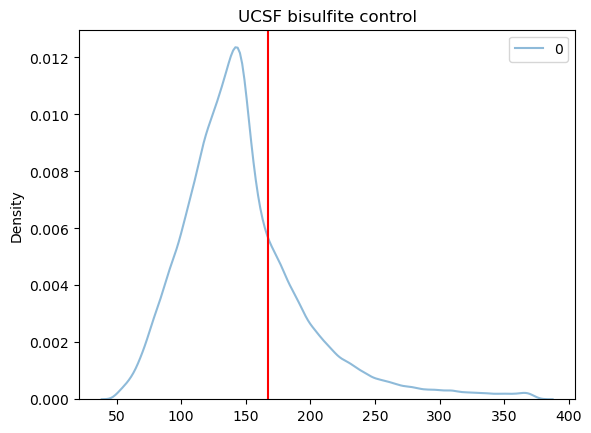

In [21]:
df = pd.DataFrame(fragments)
plt.figure()
sns.kdeplot(data=df, label='96', alpha=0.5)
plt.axvline(x=167, color="red")
plt.title("UCSF bisulfite control")
plt.show()

bisulfite control

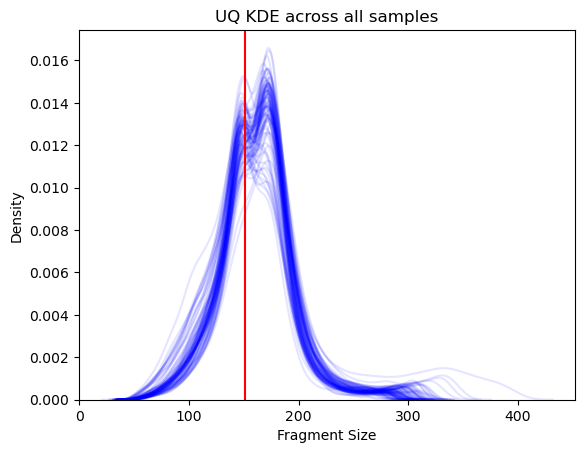

In [22]:
unique_samples = uq['Sample'].unique()
line_color = 'blue'
for sample in unique_samples:
    sns.kdeplot(uq[uq['Sample'] == sample]['Fragment Size'], label=f'Sample {sample}', color=line_color, alpha=0.1)

# Add labels and title
plt.xlabel('Fragment Size')
plt.ylabel('Density')
plt.axvline(x=151, color="red")
plt.title("UQ KDE across all samples")
plt.show()

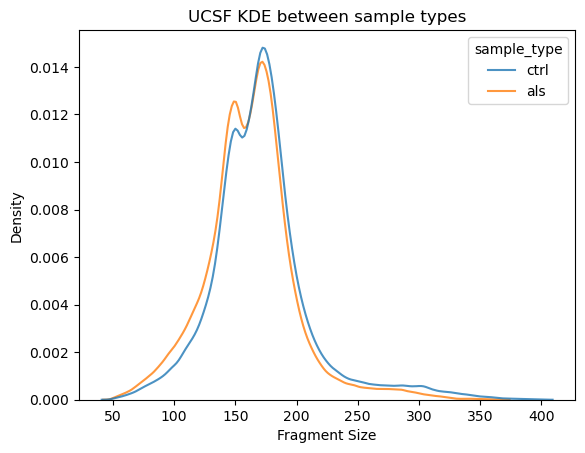

In [23]:
plt.figure()
sns.kdeplot(data=ucsf_merged_df, x='Fragment Size', hue='sample_type', fill=False, common_norm=False, alpha=0.8)
#plt.axvline(x=151, color="red")
plt.title("UCSF KDE between sample types")
#plt.savefig("ucsf_kde_smooth.png")
plt.show()

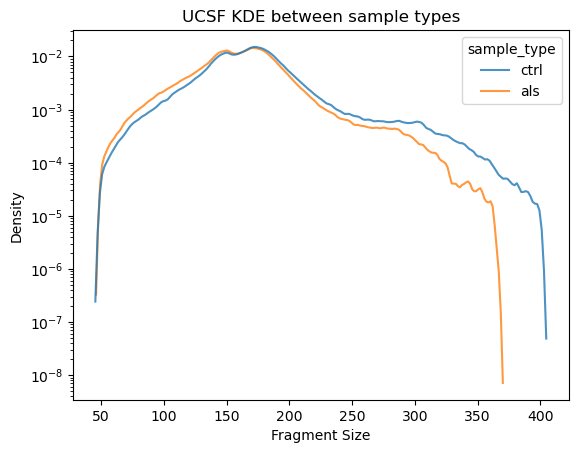

In [24]:
plt.figure()
sns.kdeplot(data=ucsf_merged_df, x='Fragment Size', hue='sample_type', fill=False, common_norm=False, alpha=0.8, bw_adjust=0.5)
#plt.axvline(x=151, color="red")
plt.title("UCSF KDE between sample types")
plt.yscale('log')
#plt.savefig("ucsf_kde_smooth.png")
plt.show()

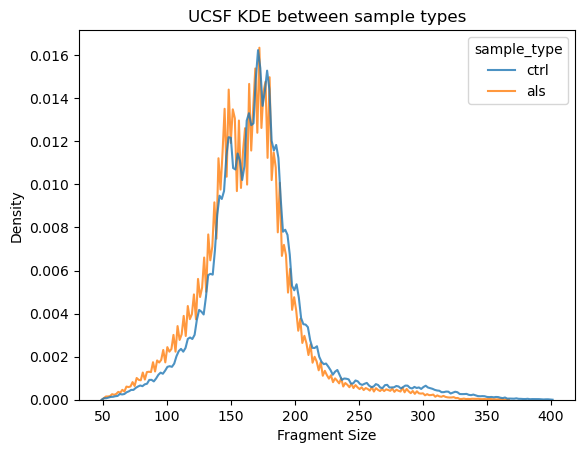

In [25]:
plt.figure()
sns.kdeplot(data=ucsf_merged_df, x='Fragment Size', hue='sample_type', fill=False, bw_adjust=0.13, common_norm=False, alpha=0.8)
#plt.axvline(x=151, color="red")
plt.title("UCSF KDE between sample types")
#plt.savefig("ucsf_kde_jagged.png")
plt.show()

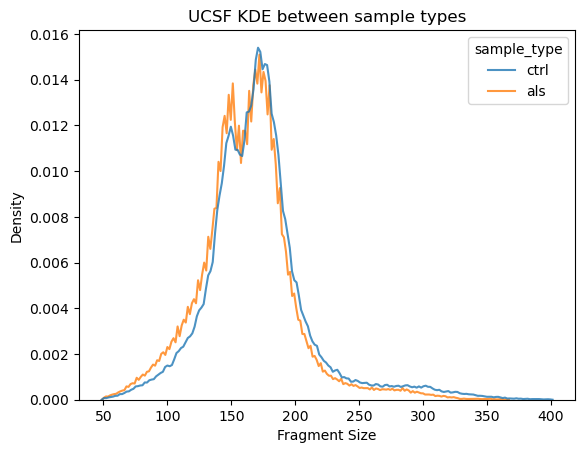

In [26]:
plt.figure()
sns.kdeplot(data=ucsf_merged_df, x='Fragment Size', hue='sample_type', fill=False, bw_adjust=0.15, common_norm=False, alpha=0.8)
#plt.axvline(x=151, color="red")
plt.title("UCSF KDE between sample types")
#plt.savefig("ucsf_kde_jagged.png")
plt.show()

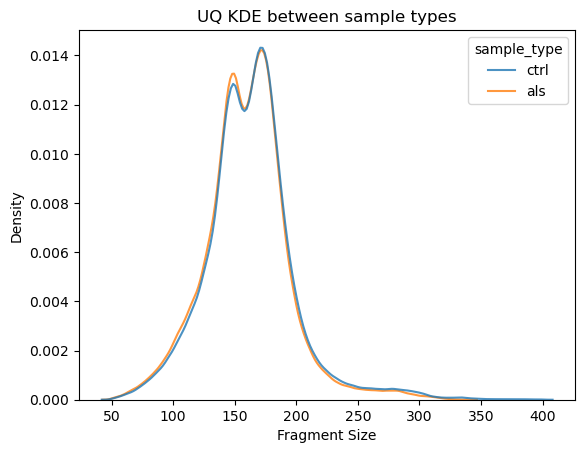

In [27]:
plt.figure()
sns.kdeplot(data=uq_merged_df, x='Fragment Size', hue='sample_type', fill=False, common_norm=False, alpha=0.8)
#plt.axvline(x=151, color="red")
plt.title("UQ KDE between sample types")
#plt.savefig("uq_kde_smooth.png")
plt.show()

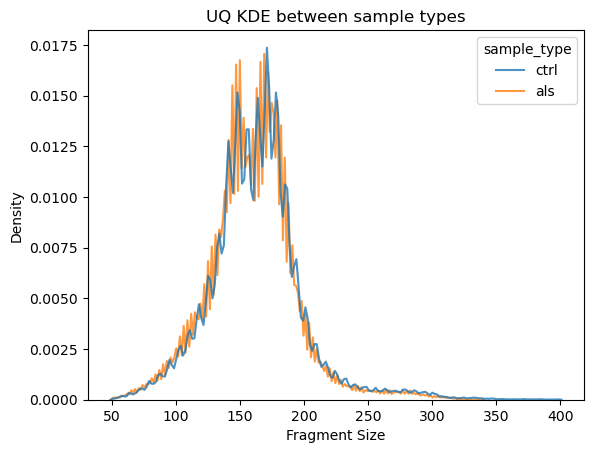

In [28]:
plt.figure()
sns.kdeplot(data=uq_merged_df, x='Fragment Size', hue='sample_type', bw_adjust=0.13, fill=False, common_norm=False, alpha=0.8)
#plt.axvline(x=151, color="red")
plt.title("UQ KDE between sample types")
#plt.savefig("uq_kde_jagged.png")
plt.show()

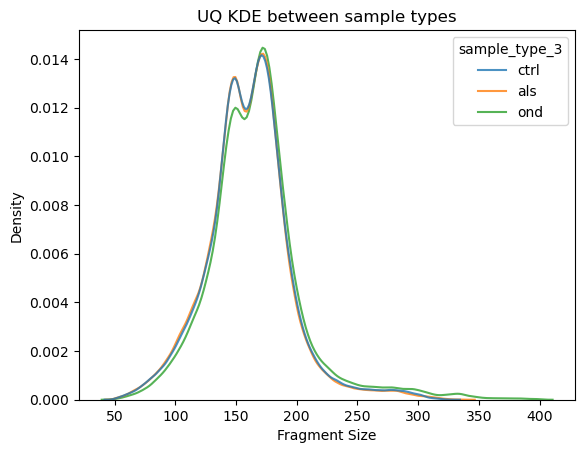

In [29]:
plt.figure()
sns.kdeplot(data=uq_merged_df, x='Fragment Size', hue='sample_type_3', fill=False, common_norm=False, alpha=0.8)
plt.title("UQ KDE between sample types")
plt.show()

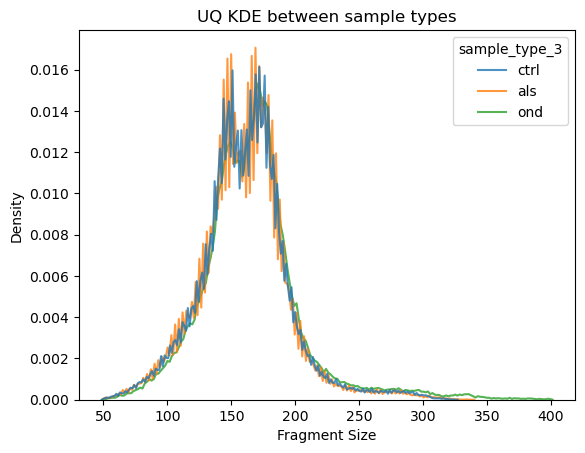

In [30]:
plt.figure()
sns.kdeplot(data=uq_merged_df, x='Fragment Size', hue='sample_type_3', fill=False, bw_adjust=0.13, common_norm=False, alpha=0.8)
plt.title("UQ KDE between sample types")
plt.show()

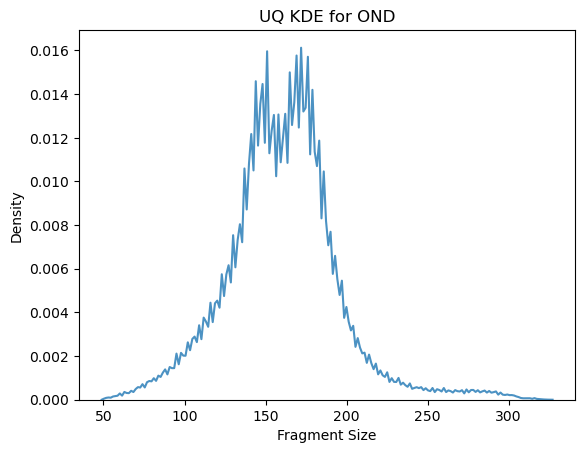

In [31]:
plt.figure()
sns.kdeplot(data=uq_merged_df[uq_merged_df["sample_type_3"] == 'ctrl'], x='Fragment Size', fill=False, bw_adjust=0.13, common_norm=False, alpha=0.8)
plt.title("UQ KDE for OND")
plt.show()

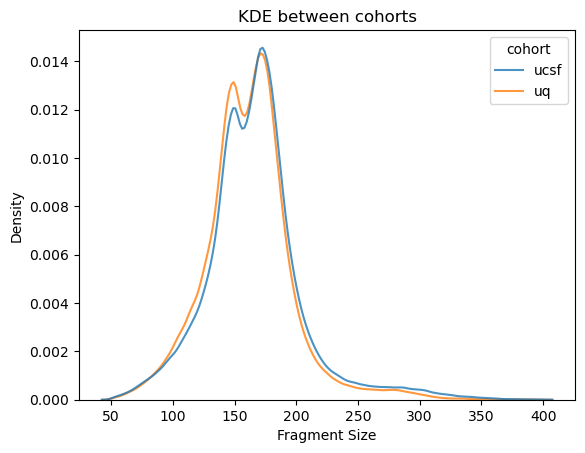

In [32]:
plt.figure()
sns.kdeplot(data=merged_df, x='Fragment Size', hue='cohort', fill=False, common_norm=False, alpha=0.8)
plt.title("KDE between cohorts")
#plt.savefig('kde_smooth.png')
plt.show()

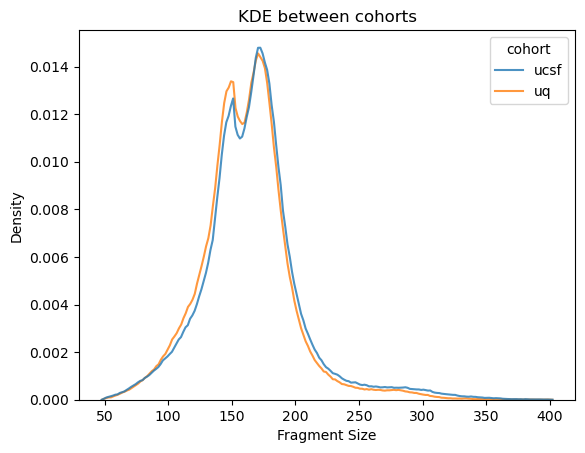

In [33]:
plt.figure()
sns.kdeplot(data=merged_df, x='Fragment Size', hue='cohort', bw_adjust=0.3, fill=False, common_norm=False, alpha=0.8)
plt.title("KDE between cohorts")
#plt.savefig('kde_jagged.png')
plt.show()

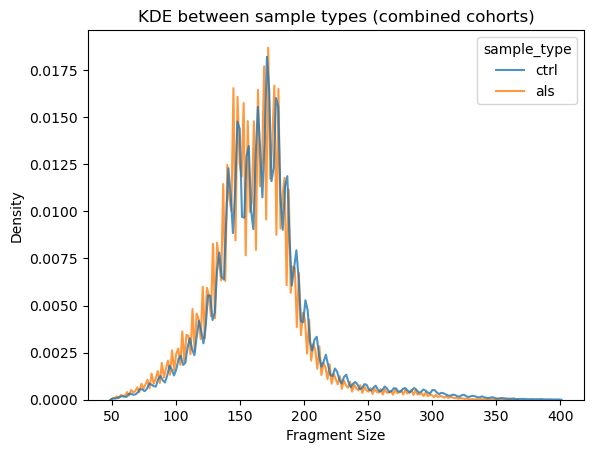

In [34]:
plt.figure()
sns.kdeplot(data=merged_df, x='Fragment Size', hue='sample_type', bw_adjust=0.13, fill=False, common_norm=False, alpha=0.8)
plt.title("KDE between sample types (combined cohorts)")
#plt.savefig('combined_kde_jagged.png')
plt.show()

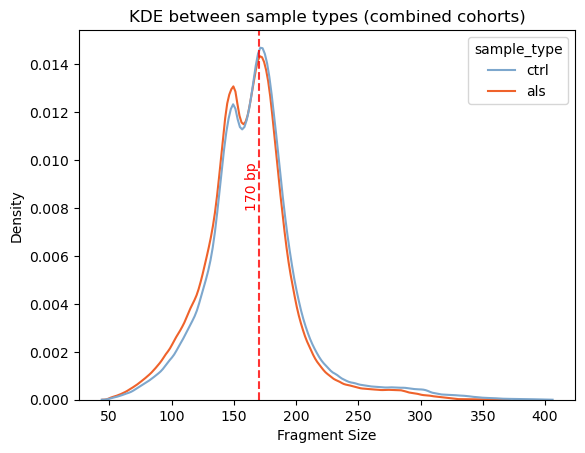

In [35]:
plt.figure()
sns.kdeplot(data=merged_df, x='Fragment Size', hue='sample_type', fill=False, palette=blue_orange, bw_adjust=0.8, common_norm=False)
plt.title("KDE between sample types (combined cohorts)")
plt.axvline(x=170, color='r', linestyle='--', alpha=0.8)
plt.text(x=170, y=0.008, s='170 bp', rotation=90, ha='right', color='r')
#plt.savefig('combined_kde_smooth.png')
plt.show()

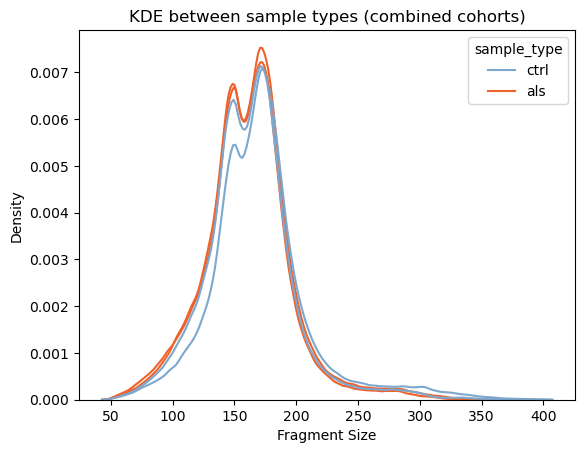

In [36]:
plt.figure()
sns.kdeplot(data=ucsf_merged_df, x='Fragment Size', hue='sample_type', fill=False, palette=blue_orange, bw_adjust=0.8, common_norm=True)
sns.kdeplot(data=uq_merged_df, x='Fragment Size', hue='sample_type', fill=False, palette=blue_orange, bw_adjust=0.8, common_norm=True)
plt.title("KDE between sample types (combined cohorts)")
#plt.savefig('combined_kde_smooth.png')
plt.show()

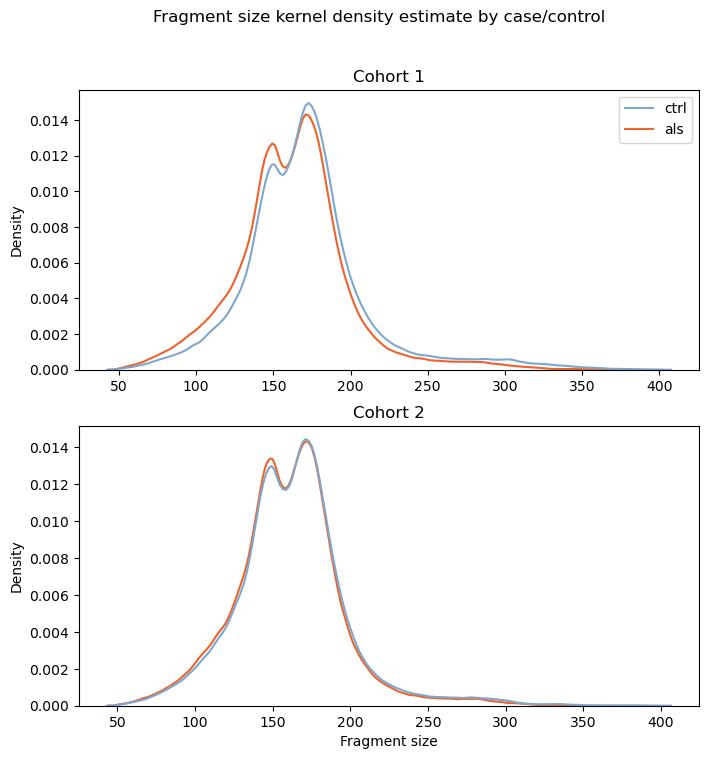

In [37]:
# Create subplots (2 rows, 1 column) with narrower plots
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=False)  # Reduced width for narrower plots

# Plot for UCSF cohort
sns.kdeplot(data=ucsf_merged_df, x='Fragment Size', hue='sample_type', palette=blue_orange, fill=False, bw_adjust=0.8, common_norm=False, ax=axes[0])

# Add vertical line at 170 bp with label
#axes[0].axvline(x=170, color='#af1a24', linestyle='--', alpha=0.8)
#axes[0].text(x=170 - 2, y=0.006, s='170 bp', rotation=90, ha='right', color='#af1a24')

axes[0].set_title("Cohort 1")
axes[0].set_xlabel('')  # Remove x-axis label to avoid redundancy
axes[0].set_ylabel('Density')

# Change legend title for the first subplot
# legend = axes[0].legend(loc='upper right')
axes[0].get_legend().set_title('')

# Plot for UQ cohort
sns.kdeplot(data=uq_merged_df, x='Fragment Size', hue='sample_type', palette=blue_orange, fill=False, bw_adjust=0.8, common_norm=False, ax=axes[1])

# Add vertical line at 170 bp with label
#axes[1].axvline(x=170, color='#af1a24', linestyle='--', alpha=0.8)
#axes[1].text(x=170 - 2, y=0.006, s='170 bp', rotation=90, ha='right', color='#af1a24')

axes[1].set_title("Cohort 2")
axes[1].set_xlabel('Fragment size')
axes[1].set_ylabel('Density')

# Remove legend from the second subplot
axes[1].get_legend().remove()

# Adjust layout to make plots closer together
plt.subplots_adjust(hspace=0.2)

# Set a common title for the figure
fig.suptitle("Fragment size kernel density estimate by case/control", fontsize=12)

# Show the plot
#plt.savefig('kde.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


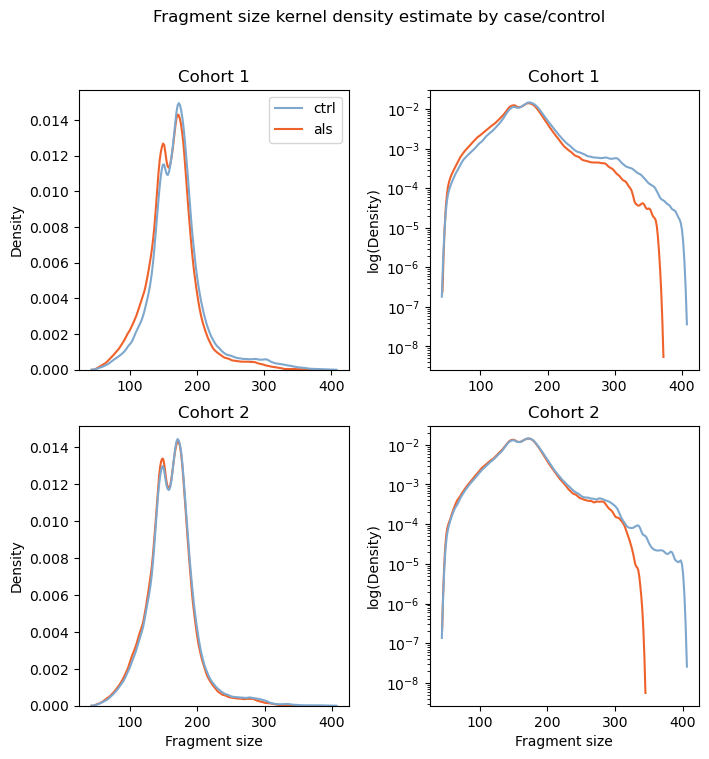

In [38]:
# Create subplots with 2 rows and 2 columns (4 subplots)
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=False)  # Adjusted width for the wider figure

# Plot for UCSF cohort (linear scale)
sns.kdeplot(data=ucsf_merged_df, x='Fragment Size', hue='sample_type', palette=blue_orange, fill=False, bw_adjust=0.8, common_norm=False, ax=axes[0, 0])
axes[0, 0].set_title("Cohort 1")
axes[0, 0].set_xlabel('')  # Remove x-axis label to avoid redundancy
axes[0, 0].set_ylabel('Density')
axes[0, 0].get_legend().set_title('')

# Plot for UCSF cohort (log scale)
sns.kdeplot(data=ucsf_merged_df, x='Fragment Size', hue='sample_type', palette=blue_orange, fill=False, bw_adjust=0.8, common_norm=False, ax=axes[0, 1])
axes[0, 1].set_yscale('log')
axes[0, 1].set_title("Cohort 1")
axes[0, 1].set_xlabel('')  # Remove x-axis label to avoid redundancy
axes[0, 1].set_ylabel('log(Density)')
axes[0, 1].get_legend().remove()

# Plot for UQ cohort (linear scale)
sns.kdeplot(data=uq_merged_df, x='Fragment Size', hue='sample_type', palette=blue_orange, fill=False, bw_adjust=0.8, common_norm=False, ax=axes[1, 0])
axes[1, 0].set_title("Cohort 2")
axes[1, 0].set_xlabel('Fragment size')
axes[1, 0].set_ylabel('Density')
axes[1, 0].get_legend().remove()

# Plot for UQ cohort (log scale)
sns.kdeplot(data=uq_merged_df, x='Fragment Size', hue='sample_type', palette=blue_orange, fill=False, bw_adjust=0.8, common_norm=False, ax=axes[1, 1])
axes[1, 1].set_yscale('log')
axes[1, 1].set_title("Cohort 2")
axes[1, 1].set_xlabel('Fragment size')
axes[1, 1].set_ylabel('log(Density)')
axes[1, 1].get_legend().remove()

# Adjust layout to make plots closer together
plt.subplots_adjust(hspace=0.2, wspace=0.3)

# Set a common title for the figure
fig.suptitle("Fragment size kernel density estimate by case/control", fontsize=12)

# Show the plot
plt.savefig('kde.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


make histograms as well

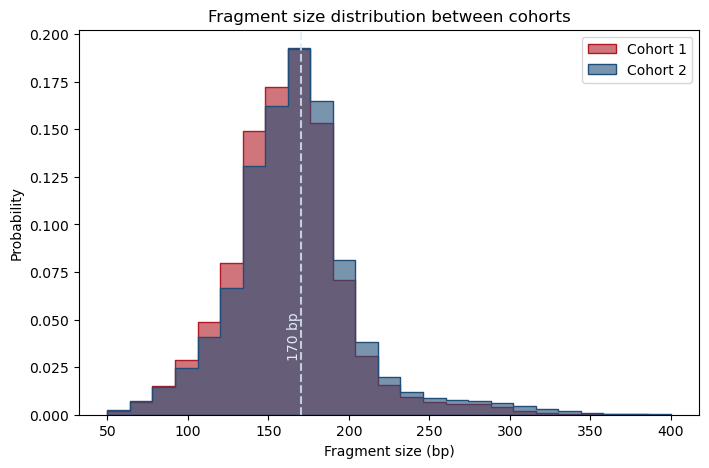

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(data=merged_df, x='Fragment Size', element='step', hue='cohort', palette=cohort_palette, stat='probability', binwidth=14, common_norm=False, alpha=0.6)
plt.title("Fragment size distribution between cohorts")
plt.xlabel("Fragment size (bp)")
plt.axvline(x=170, color='#ddebf7', linestyle='--', alpha=0.8)
plt.text(x=170, y=0.03, s='170 bp', rotation=90, ha='right', color='#ddebf7')
plt.legend(['Cohort 1', 'Cohort 2'])
#plt.savefig('hist.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

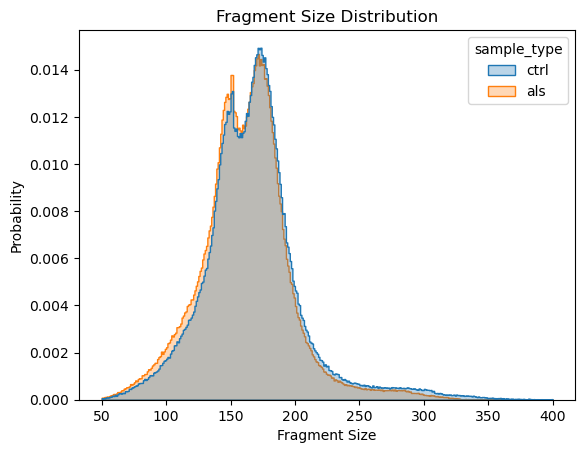

In [40]:
plt.figure()
sns.histplot(data=merged_df, x='Fragment Size', hue='sample_type', element='step', stat='probability', color='blue', binwidth=1, common_norm=False, alpha=0.3)
plt.title("Fragment Size Distribution")
plt.show()

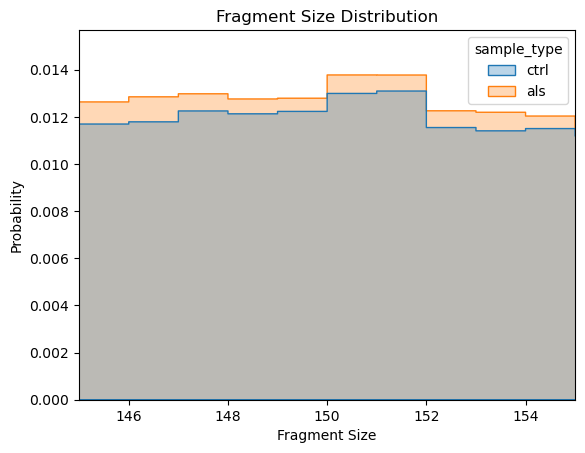

In [41]:
plt.figure()
sns.histplot(data=merged_df, x='Fragment Size', hue='sample_type', element='step', stat='probability', color='blue', binwidth=1, common_norm=False, alpha=0.3)
plt.title("Fragment Size Distribution")
plt.xlim(145,155)
plt.show()

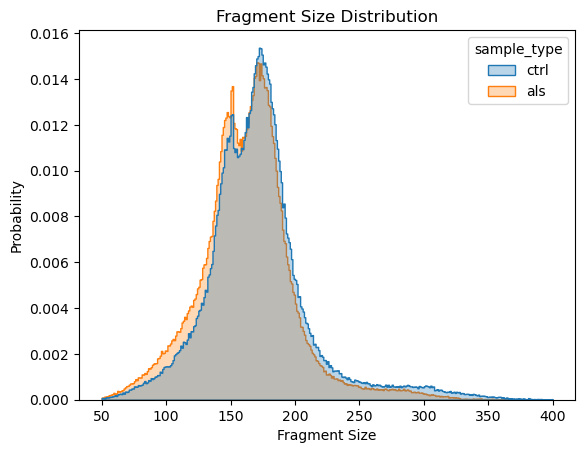

In [42]:
plt.figure()
sns.histplot(data=merged_df[merged_df['cohort'] == 'ucsf'], x='Fragment Size', hue='sample_type', element='step', stat='probability', color='blue', binwidth=1, common_norm=False, alpha=0.3)
plt.title("Fragment Size Distribution")
plt.show()

In [43]:
merged_df['frag'] = merged_df['Fragment Size']%14

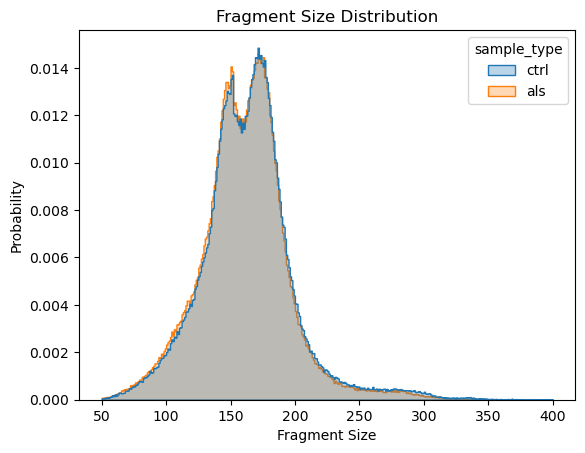

In [44]:
plt.figure()
sns.histplot(data=merged_df[merged_df['cohort'] == 'uq'], x='Fragment Size', hue='sample_type', element='step', stat='probability', color='blue', binwidth=1, common_norm=False, alpha=0.3)
plt.title("Fragment Size Distribution")
plt.show()

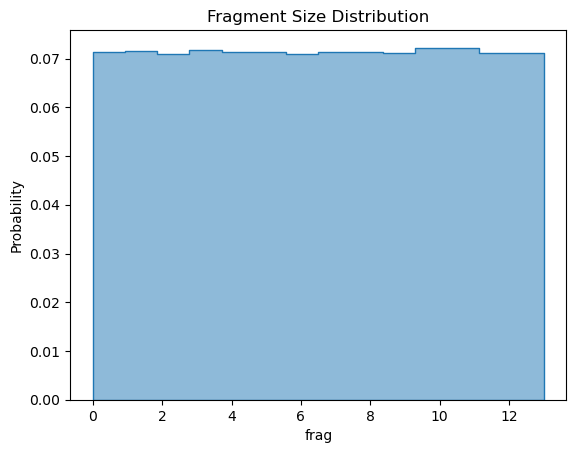

In [45]:
plt.figure()
sns.histplot(data=merged_df[merged_df['sample_type'] == 'ctrl'], x='frag', element='step', bins=14, stat='probability', common_norm=False, alpha=0.5)
plt.title("Fragment Size Distribution")

#plt.savefig('overall_distribution_lo_res.png')
plt.show()

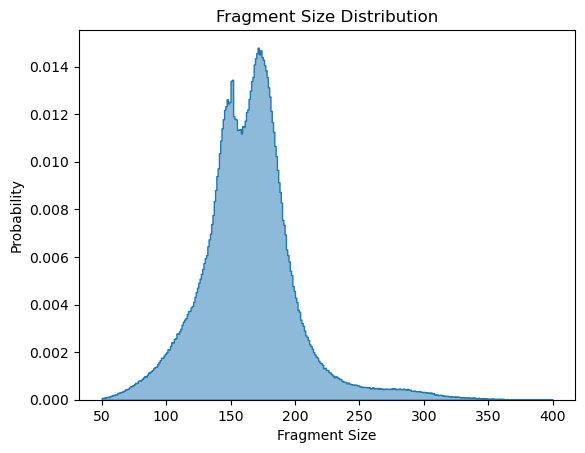

In [46]:
plt.figure()
sns.histplot(data=merged_df, x='Fragment Size', element='step', binwidth=1, stat='probability', common_norm=False, alpha=0.5)
plt.title("Fragment Size Distribution")
#plt.savefig('overall_distribution_hi_res.png')
plt.show()

quantify noise

## fft

In [47]:
ucsf_als = merged_df[merged_df['cohort'] == 'ucsf']
ucsf_als = ucsf_als[ucsf_als['sample_type'] == 'als']['Fragment Size'].values

ucsf_ctrl = merged_df[merged_df['cohort'] == 'ucsf']
ucsf_ctrl = ucsf_ctrl[ucsf_ctrl['sample_type'] == 'ctrl']['Fragment Size'].values

uq_als = merged_df[merged_df['cohort'] == 'uq']
uq_als = uq_als[uq_als['sample_type'] == 'als']['Fragment Size'].values

uq_ctrl = merged_df[merged_df['cohort'] == 'uq']
uq_ctrl = uq_ctrl[uq_ctrl['sample_type'] == 'ctrl']['Fragment Size'].values

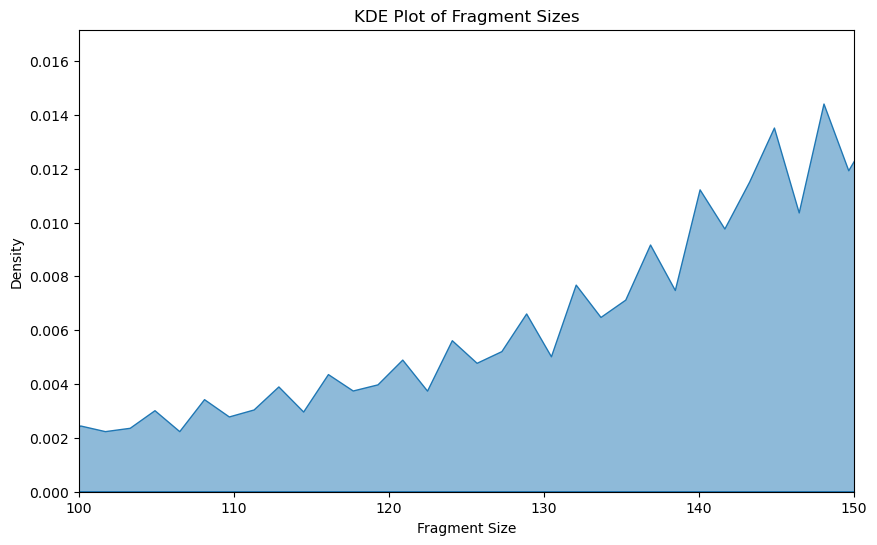

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ucsf_als, bw_adjust=0.13, fill=True, alpha=0.5)
plt.xlabel('Fragment Size')
plt.ylabel('Density')
plt.title('KDE Plot of Fragment Sizes')
plt.xlim(100, 150)
plt.show()

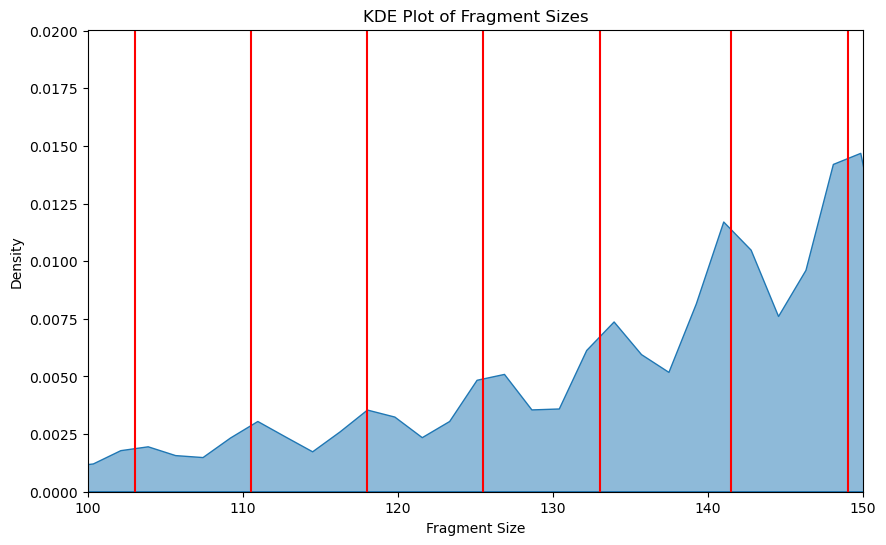

In [49]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ucsf_ctrl, bw_adjust=0.1, fill=True, alpha=0.5)
plt.xlabel('Fragment Size')
plt.ylabel('Density')
plt.xlim(100, 150)
plt.title('KDE Plot of Fragment Sizes')
plt.axvline(x=103, color="red")
plt.axvline(x=110.5, color="red")
plt.axvline(x=118, color="red")
plt.axvline(x=125.5, color="red")
plt.axvline(x=133, color="red")
plt.axvline(x=141.5, color="red")
plt.axvline(x=149, color="red")
plt.show()

In [50]:
def periodicity(fragment_lengths, num_bins=400):
    
    hist, bin_edges = np.histogram(fragment_lengths, bins=num_bins)

    #apply FFT to the histogram values
    hist_fft = fft(hist)
    frequencies = fftfreq(len(hist), (bin_edges[1] - bin_edges[0]))

    #keep only the positive frequencies
    positive_frequencies = frequencies[:len(frequencies) // 2]
    positive_hist_fft = hist_fft[:len(hist_fft) // 2]

    #remove zero frequencies and corresponding FFT values
    non_zero_indices = positive_frequencies != 0
    periods = 1 / positive_frequencies[non_zero_indices]
    power_spectrum = np.abs(positive_hist_fft[non_zero_indices]) ** 2
    
    #find peaks
    peaks, _ = find_peaks(power_spectrum)
    peak_periods = periods[peaks]
    peak_powers = power_spectrum[peaks]
    
    #dict of periods and powers sorted by power
    peaks_dict = {period: power for period, power in zip(peak_periods, peak_powers)}
    sorted_peaks_dict = dict(sorted(peaks_dict.items(), key=lambda item: item[1], reverse=True))

    plt.figure(figsize=(10, 6))
    plt.plot(periods, power_spectrum, label='Power Spectrum')

    for i, (period, power) in enumerate(sorted_peaks_dict.items()):
        if i < 3:  #label the top 3 peaks
            plt.axvline(x=period, color='r', linestyle='--', alpha=0.5)
            plt.text(period, 2.5e10, f'{period:.2f}', rotation=90, ha='right')
    
    plt.xlabel('Period')
    plt.ylabel('Power')
    plt.title('Power Spectrum of Fragment Lengths Histogram')
    plt.xlim(0, 10)
    plt.ylim(0, 0.5e11)
    plt.legend()
    plt.show()
    
    #return sorted_peaks_dict

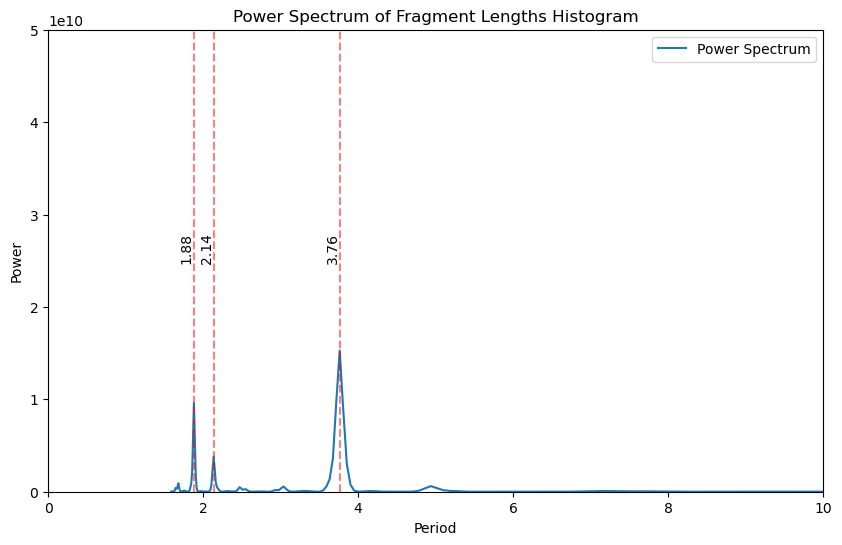

In [51]:
periodicity(ucsf_als)

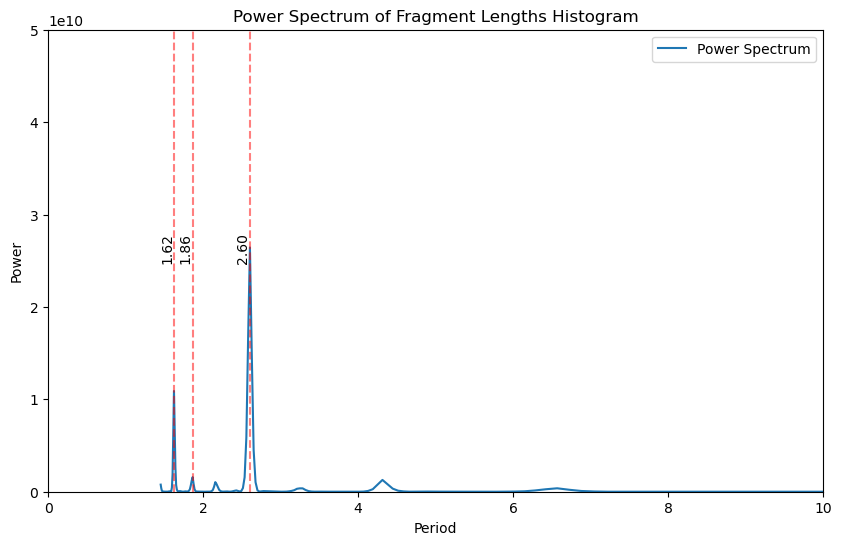

In [52]:
periodicity(uq_als)

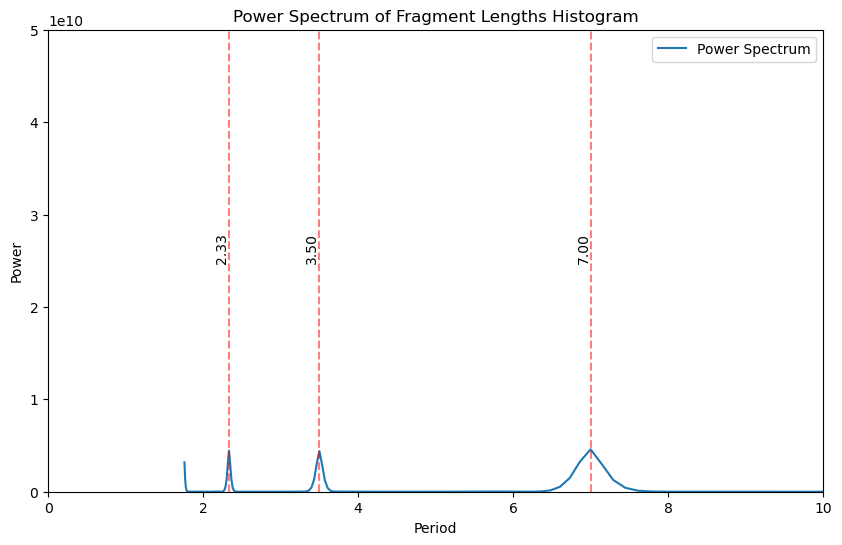

In [53]:
periodicity(uq_ctrl)

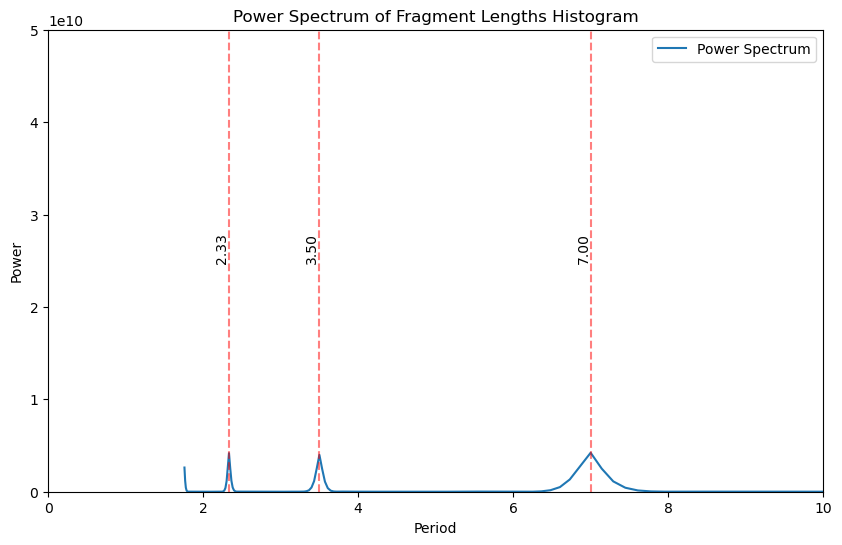

In [54]:
periodicity(ucsf_ctrl)

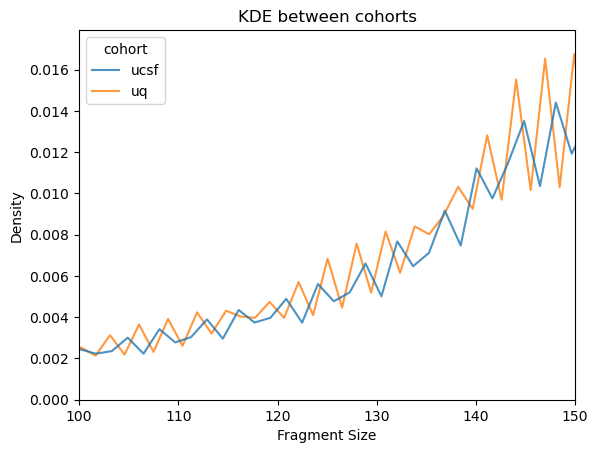

In [55]:
plt.figure()
sns.kdeplot(data=merged_df[merged_df['sample_type'] == 'als'], x='Fragment Size', hue='cohort', bw_adjust=0.13, fill=False, common_norm=False, alpha=0.8)
plt.title("KDE between cohorts")
plt.xlim(100, 150)
plt.show()

In [56]:
females = merged_df[merged_df['sex'] == 'Female']['Fragment Size'].values
males = merged_df[merged_df['sex'] == 'Male']['Fragment Size'].values

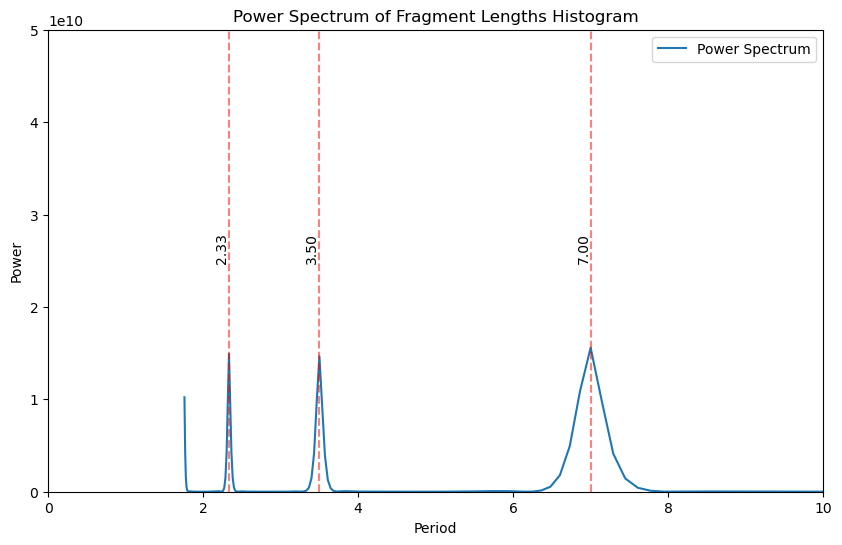

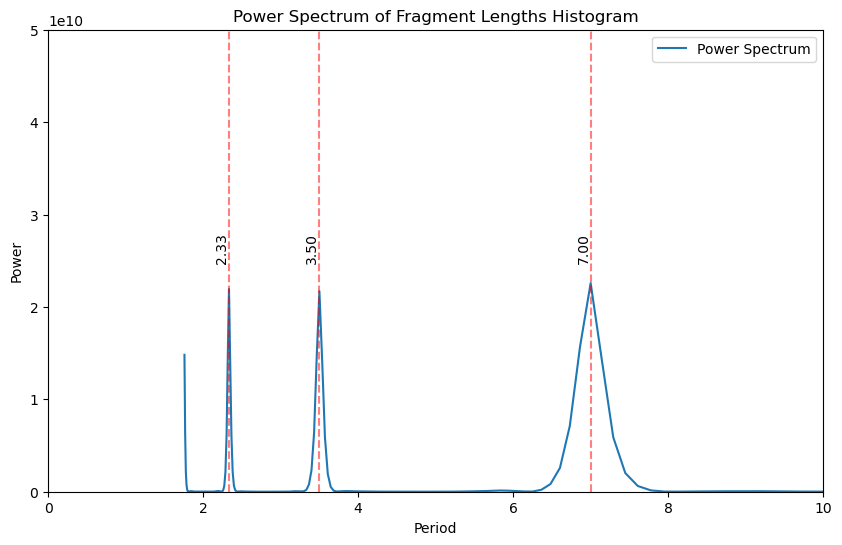

In [57]:
periodicity(females)
periodicity(males)

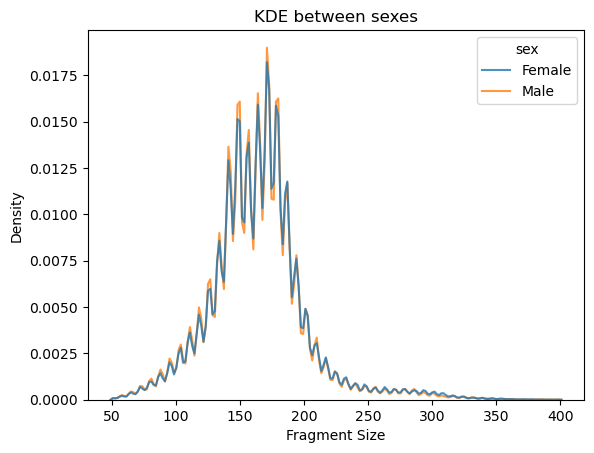

In [58]:
plt.figure()
sns.kdeplot(data=merged_df, x='Fragment Size', hue='sex', bw_adjust=0.13, fill=False, common_norm=False, alpha=0.8)
plt.title("KDE between sexes")
plt.show()

In [59]:
age_bins = pd.cut(merged_df['age'], bins=[30, 35, 40, 45, 50, 55, 60, 65, 70, 75], labels=['30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75'])
merged_df['age_bins'] = age_bins

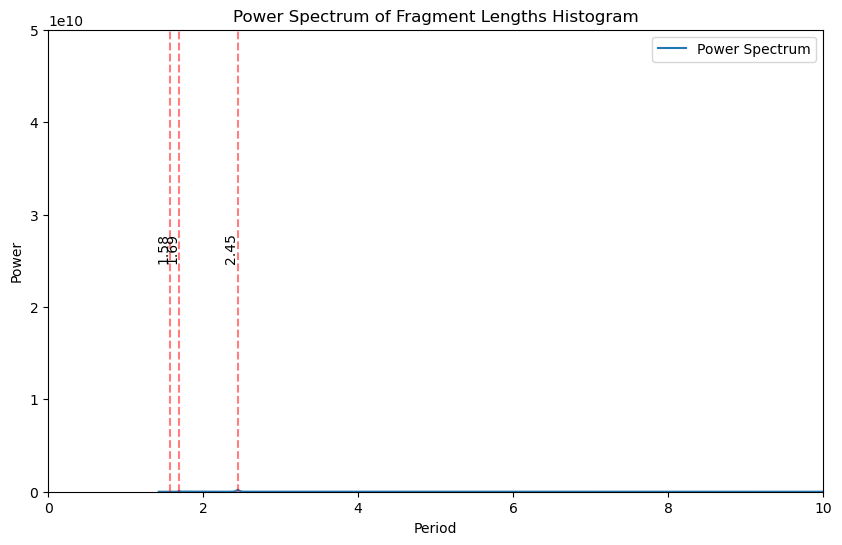

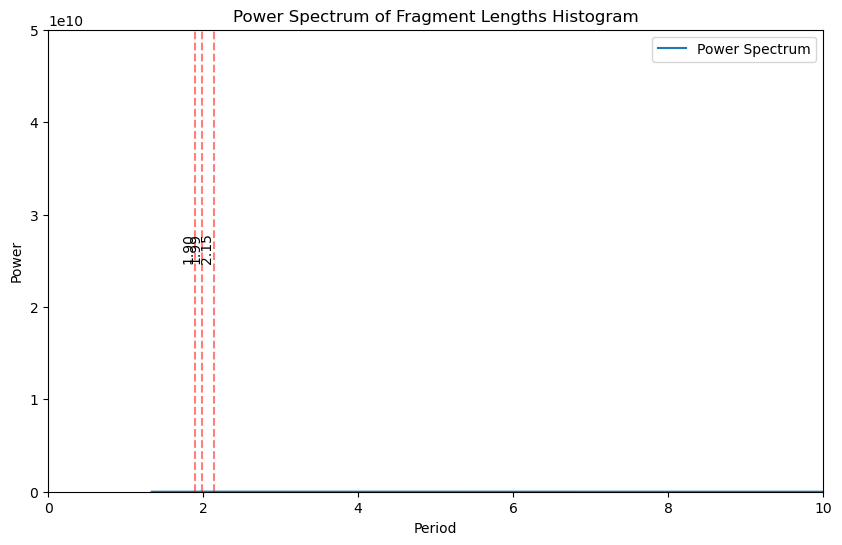

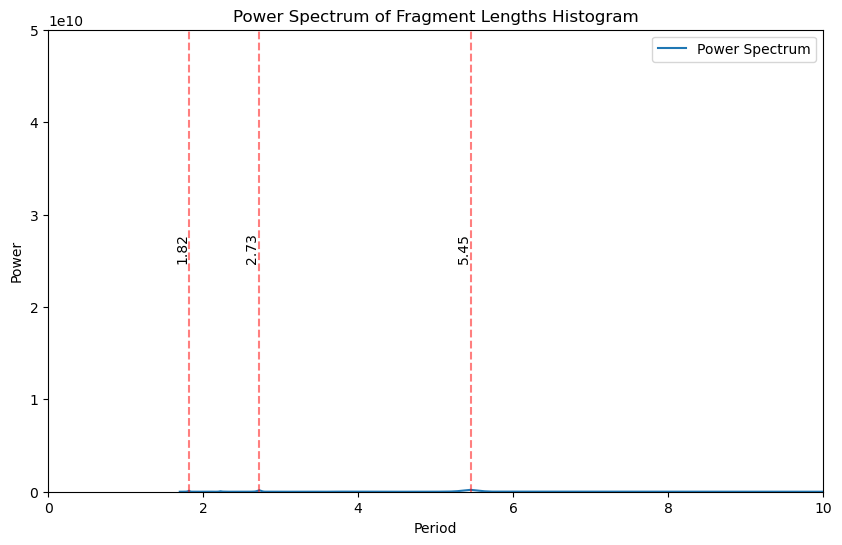

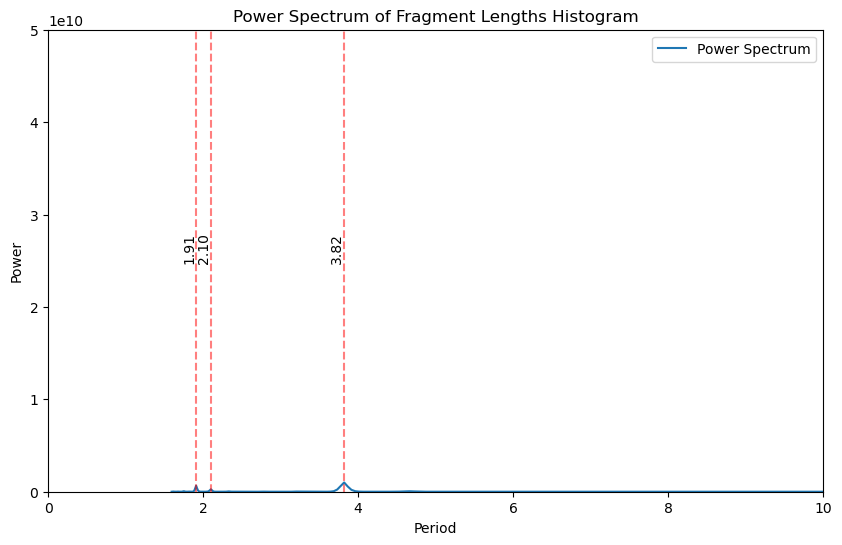

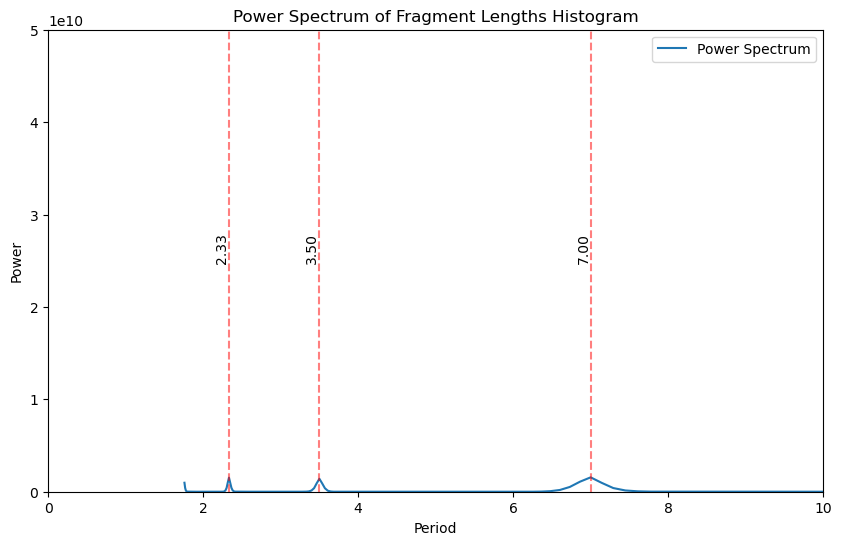

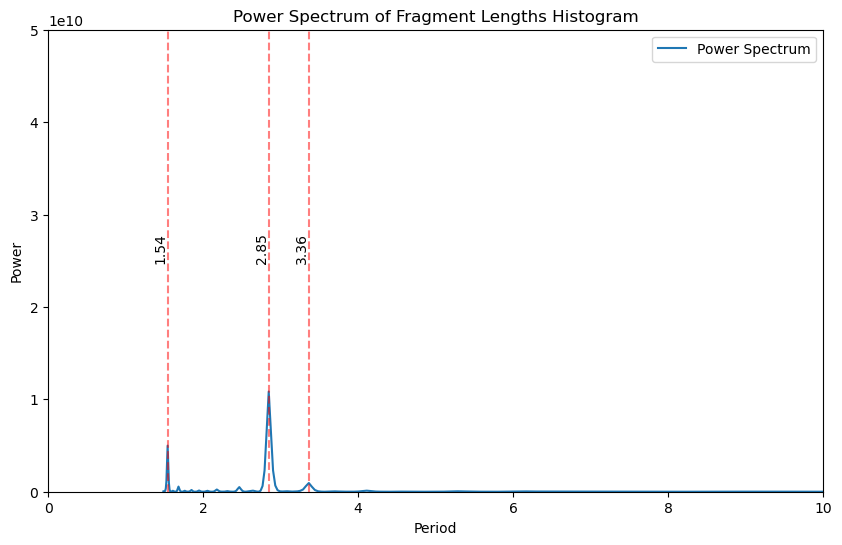

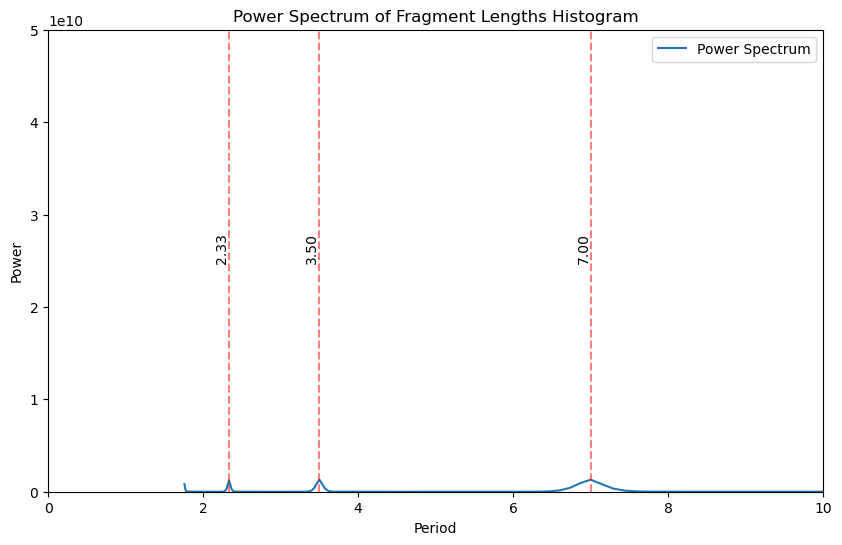

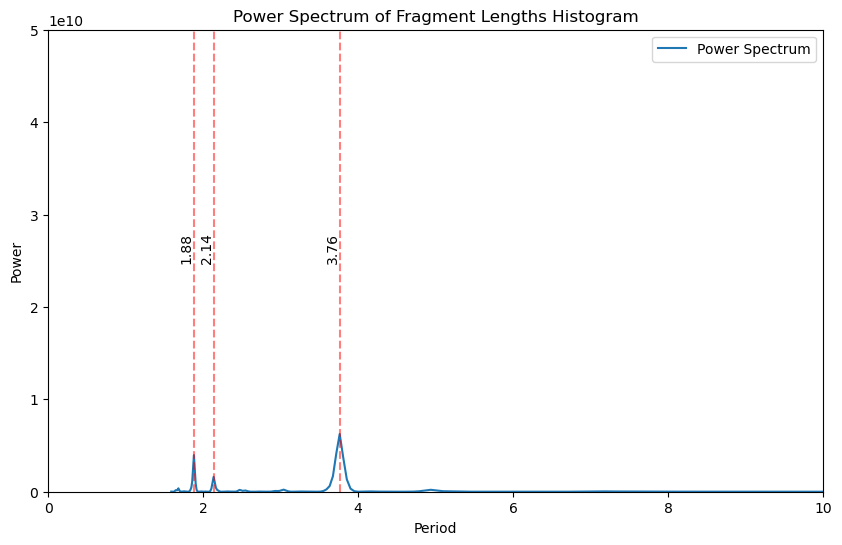

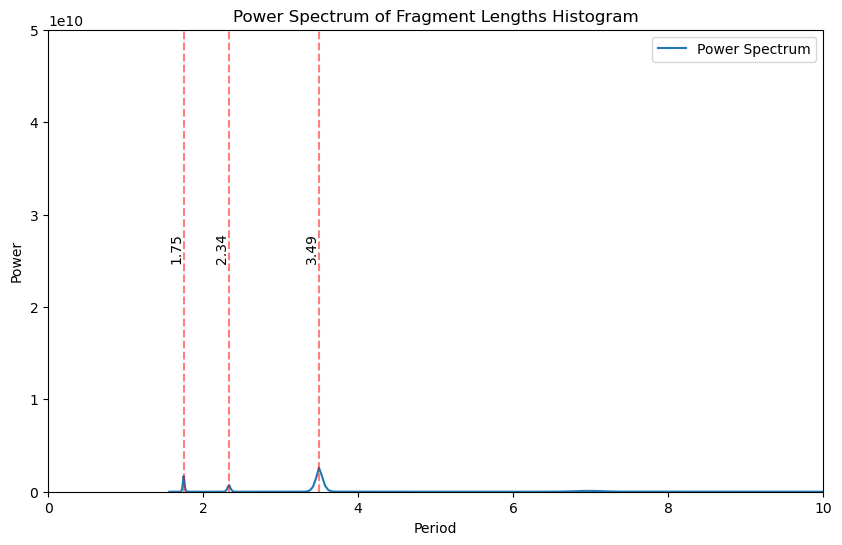

In [60]:
labels=['30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75']
for group in labels:
    sizes = merged_df[merged_df['age_bins'] == group]['Fragment Size'].values
    periodicity(sizes)

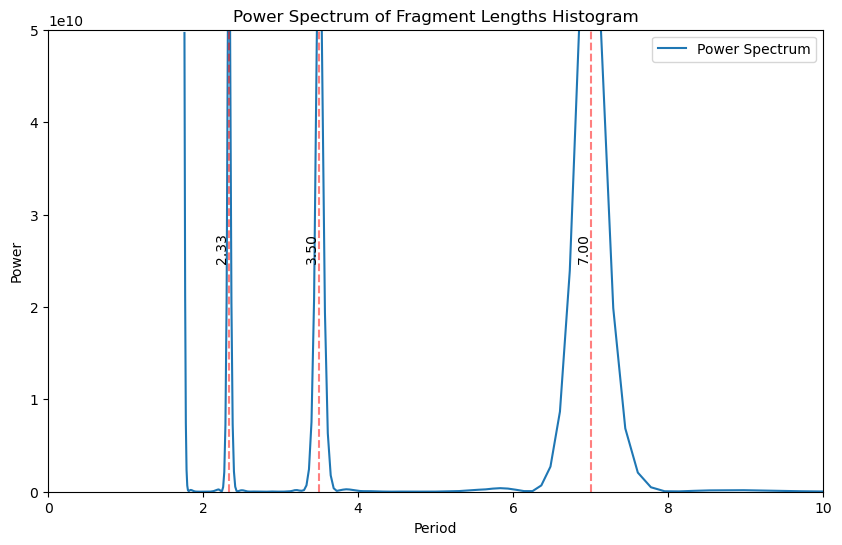

In [61]:
all_sizes = merged_df['Fragment Size'].values
periodicity(all_sizes)

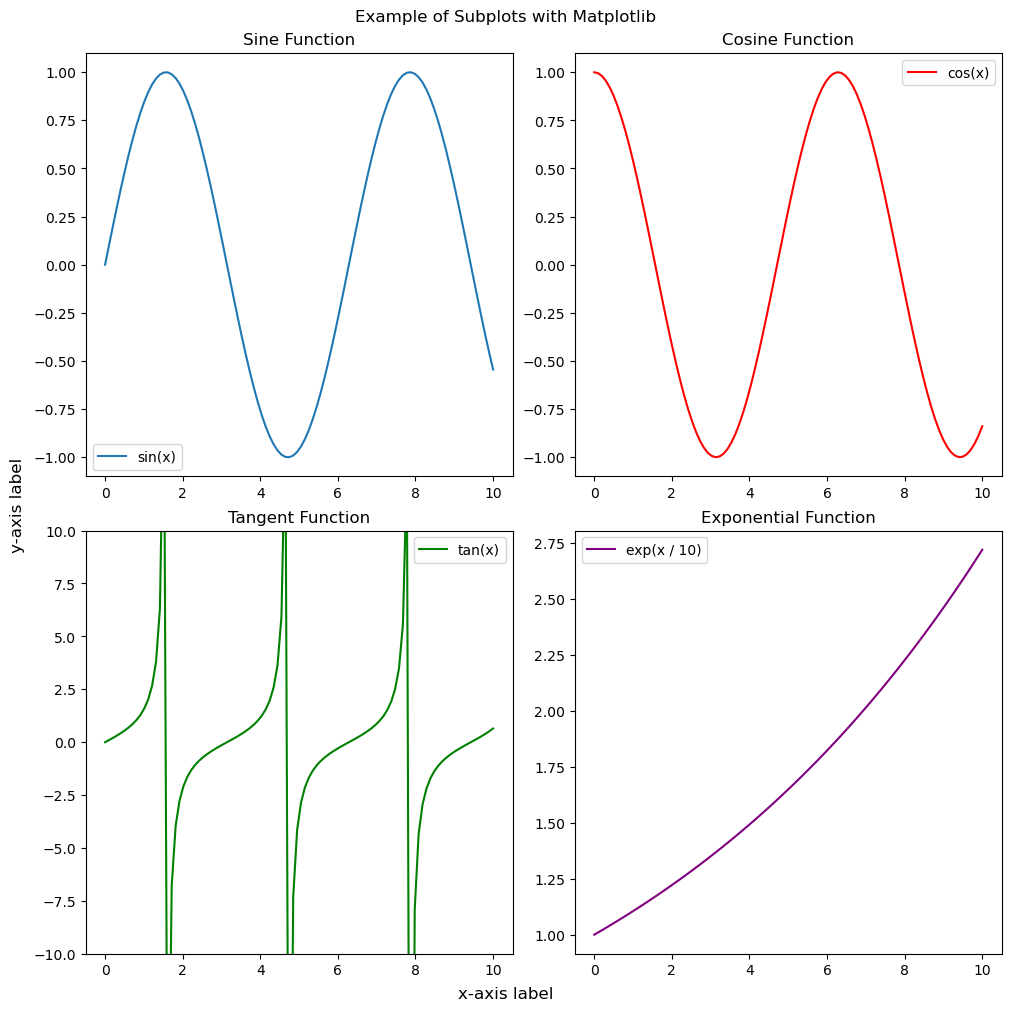

In [62]:
# Generate some example data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.exp(x / 10)

# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)

# Plot data on each subplot
axs[0, 0].plot(x, y1, label='sin(x)')
axs[0, 0].set_title('Sine Function')
axs[0, 0].legend()

axs[0, 1].plot(x, y2, label='cos(x)', color='r')
axs[0, 1].set_title('Cosine Function')
axs[0, 1].legend()

axs[1, 0].plot(x, y3, label='tan(x)', color='g')
axs[1, 0].set_title('Tangent Function')
axs[1, 0].set_ylim(-10, 10)  # Limit y-axis to avoid extreme values
axs[1, 0].legend()

axs[1, 1].plot(x, y4, label='exp(x / 10)', color='purple')
axs[1, 1].set_title('Exponential Function')
axs[1, 1].legend()

# Set common labels
fig.suptitle('Example of Subplots with Matplotlib')
fig.supxlabel('x-axis label')
fig.supylabel('y-axis label')

# Show the plot
plt.show()

In [63]:
def periodicity(fragment_lengths, bin_width=1):
    
    # Determine the range of the data
    min_length = np.min(fragment_lengths)
    max_length = np.max(fragment_lengths)
    
    # Calculate the number of bins based on the bin width
    num_bins = int((max_length - min_length) / bin_width)
    
    # Create the histogram
    hist, bin_edges = np.histogram(fragment_lengths, bins=num_bins)
    
    # Apply FFT to the histogram values
    hist_fft = fft(hist)
    frequencies = fftfreq(len(hist), (bin_edges[1] - bin_edges[0]))

    # Keep only the positive frequencies
    positive_frequencies = frequencies[:len(frequencies) // 2]
    positive_hist_fft = hist_fft[:len(hist_fft) // 2]

    # Remove zero frequencies and corresponding FFT values
    non_zero_indices = positive_frequencies != 0
    periods = 1 / positive_frequencies[non_zero_indices]
    power_spectrum = np.abs(positive_hist_fft[non_zero_indices]) ** 2
    
    # Find peaks
    peaks, _ = find_peaks(power_spectrum)
    peak_periods = periods[peaks]
    peak_powers = power_spectrum[peaks]
    
    # Create a dictionary of periods and powers sorted by power
    peaks_dict = {period: power for period, power in zip(peak_periods, peak_powers)}
    sorted_peaks_dict = dict(sorted(peaks_dict.items(), key=lambda item: item[1], reverse=True))

    # Plot the power spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(periods, power_spectrum, label='Power Spectrum')

    for i, (period, power) in enumerate(sorted_peaks_dict.items()):
        if i < 3:  # Label the top 3 peaks
            plt.axvline(x=period, color='r', linestyle='--', alpha=0.5)
            plt.text(period, 0.5e8, f'{period:.2f}', rotation=90, ha='right')
    
    plt.xlabel('Period')
    plt.ylabel('Power')
    plt.title('Power Spectrum of Fragment Lengths Histogram')
    plt.xlim(0, 10)
    plt.ylim(0, 1e8)
    plt.legend()
    plt.show()

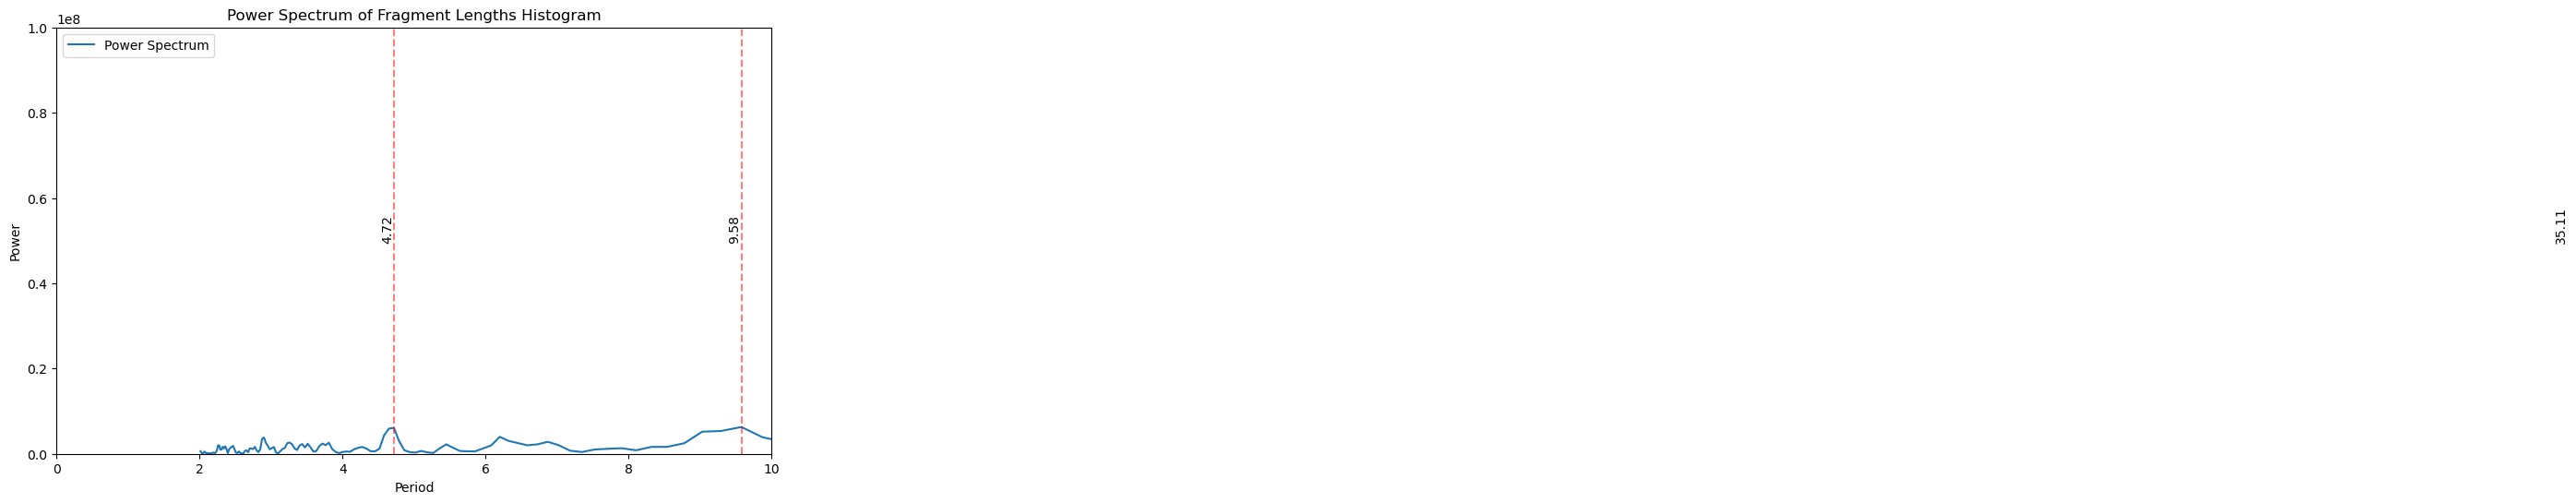

In [64]:
periodicity(ucsf_als)

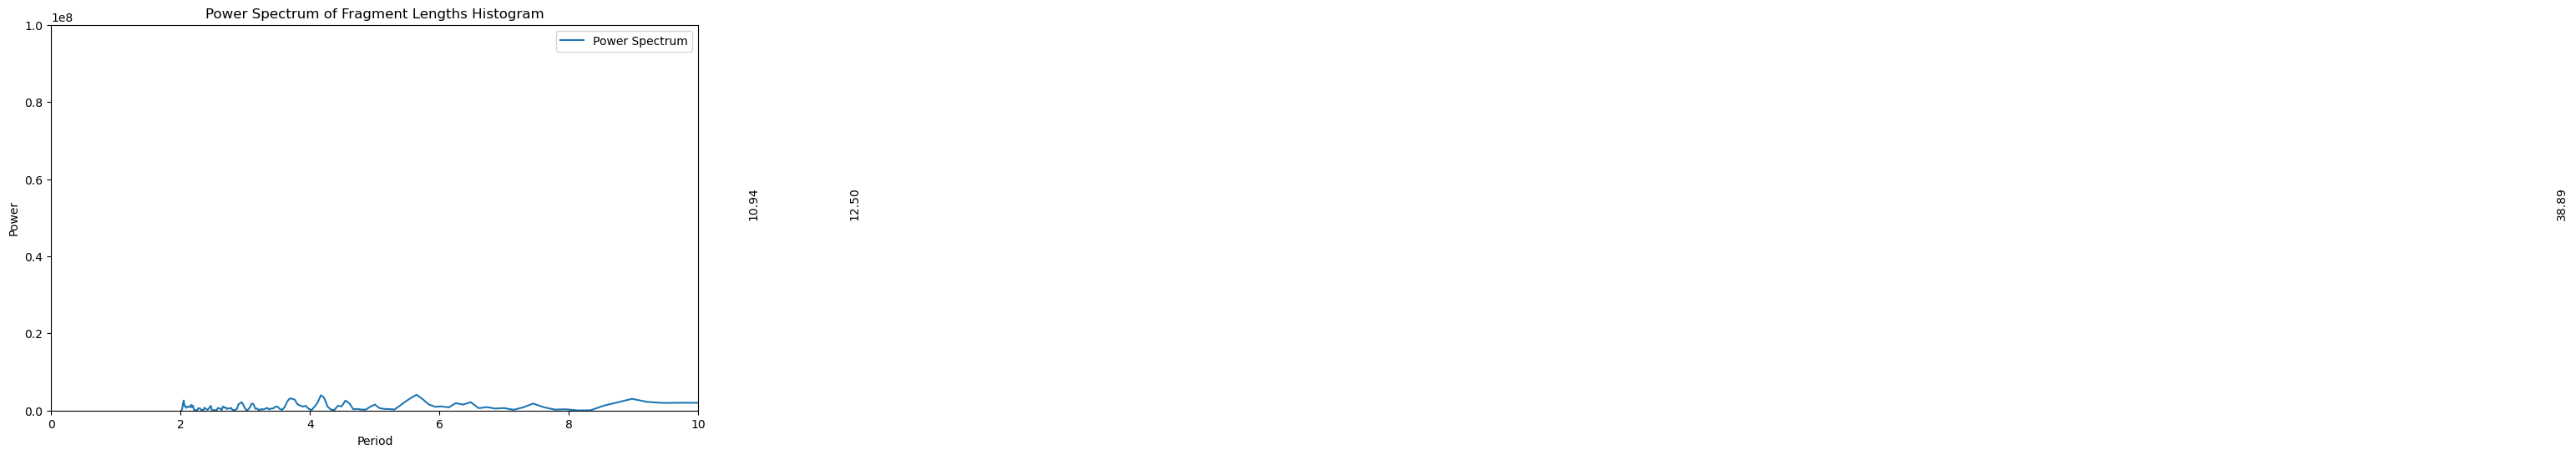

In [65]:
periodicity(ucsf_ctrl)

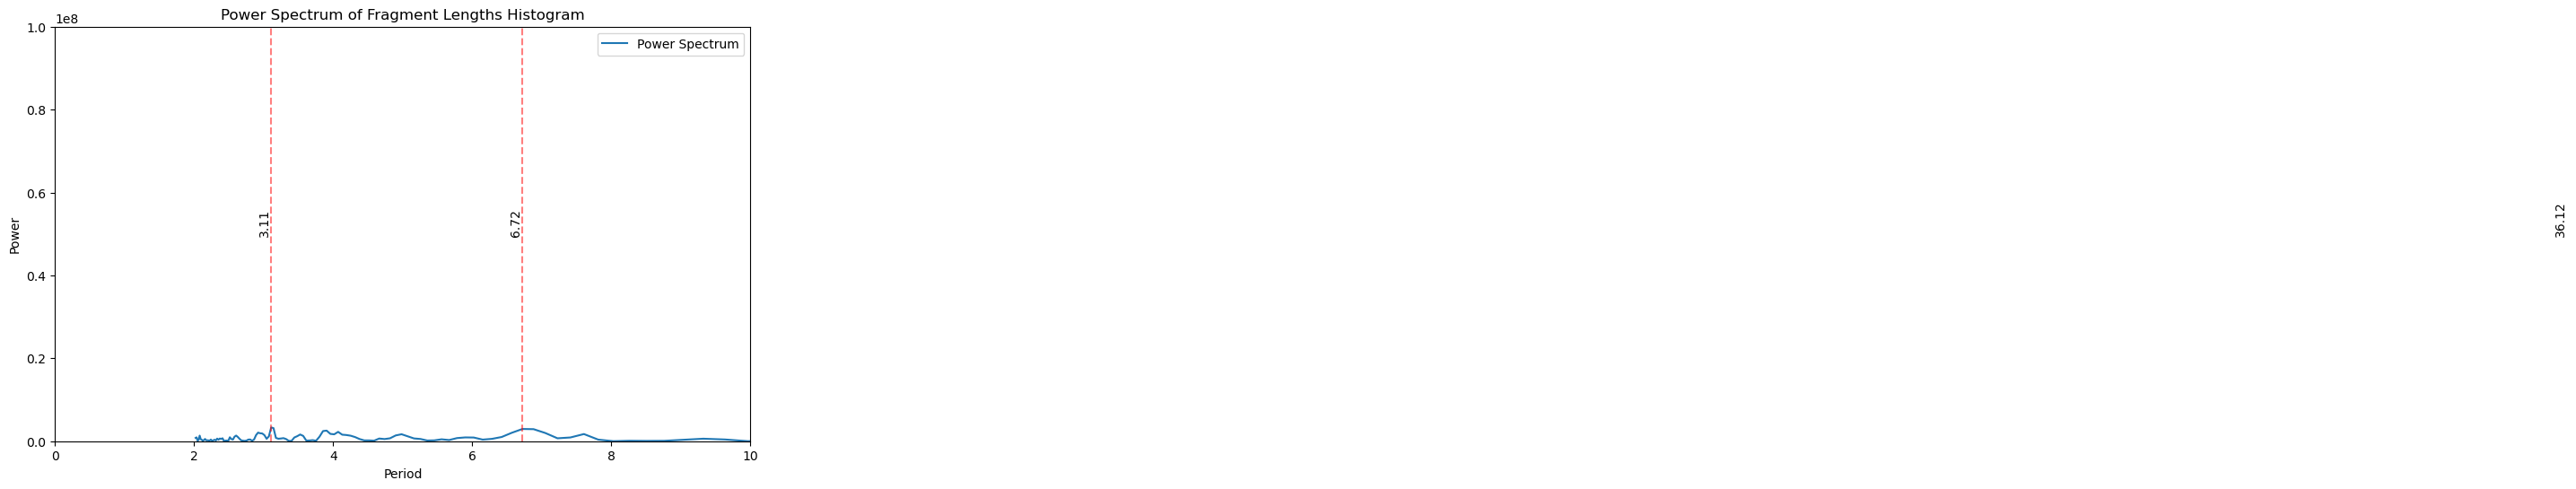

In [66]:
periodicity(uq_als)

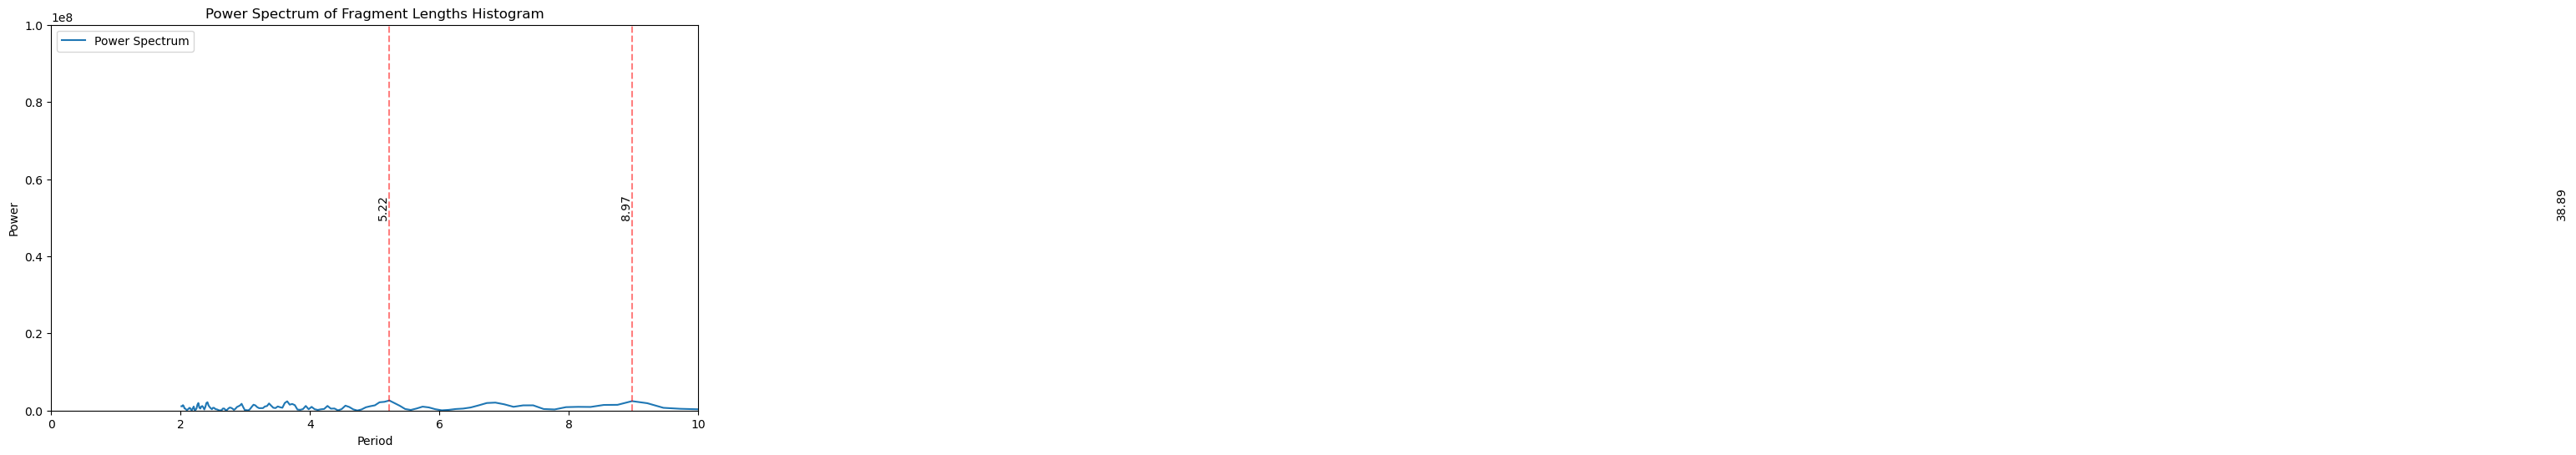

In [67]:
periodicity(uq_ctrl)

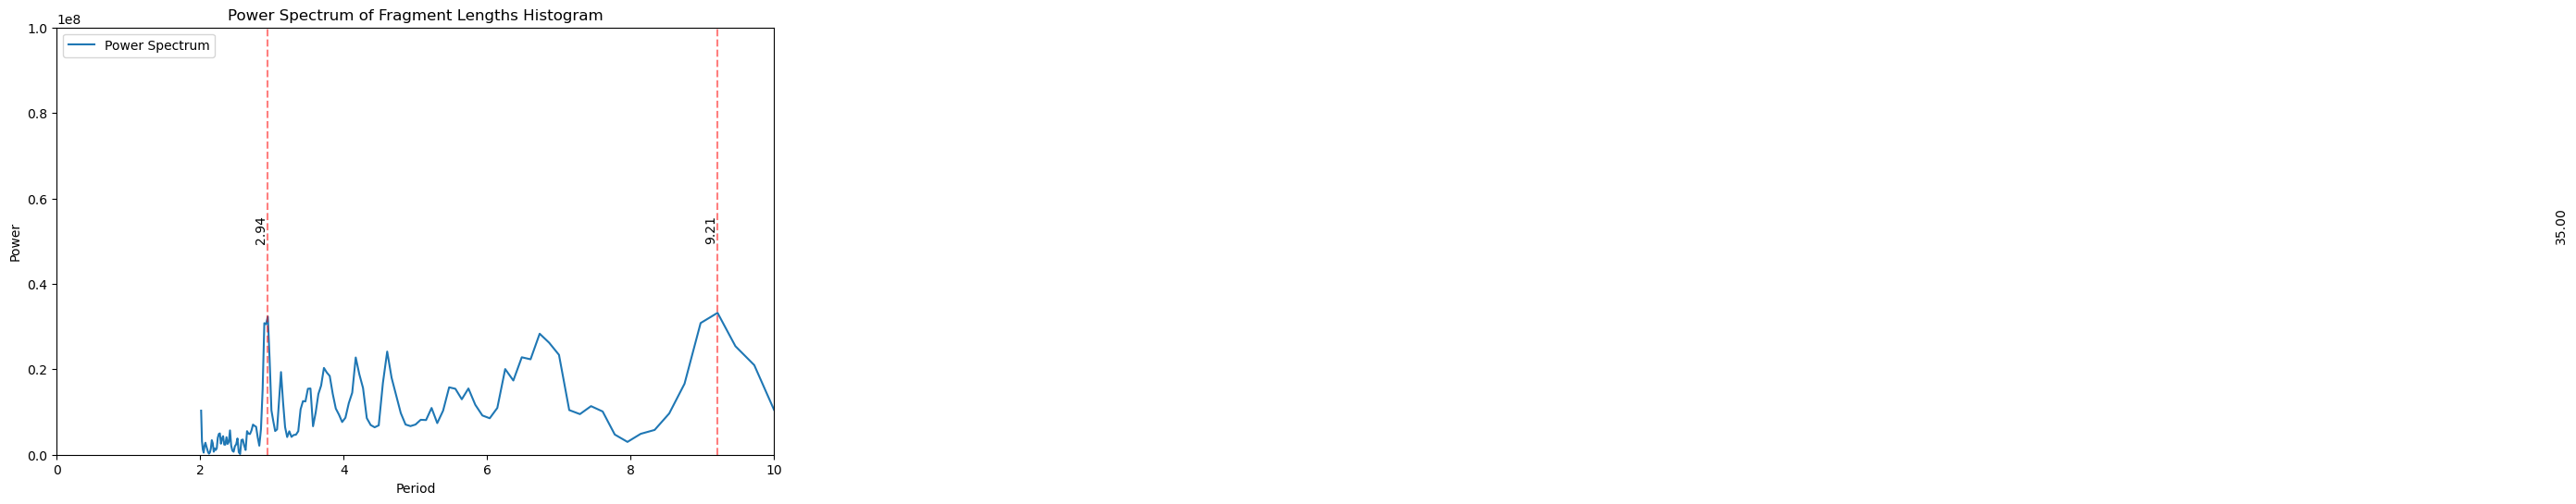

In [68]:
periodicity(all_sizes)